<a href="https://colab.research.google.com/github/rubenspinto/imersao-dados-python-alura-2025/blob/main/monitor_temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Passo 1: Preparação do Ambiente

    Carreguar as bibliotecas necessárias: Para começar, utilizaremos bibliotecas como TensorFlow ou Keras, além do Pandas para
    manipulação de dados e Matplotlib para visualização.


In [62]:
# inportaçção das bibliotecas
# Passo 1: Preparação do Ambiente
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

##Passo 2: Carregamento e Preparação dos Dados

Para simplificar, você pode usar um conjunto de dados fictício ou dados históricos reais de temperaturas médias diárias. Vamos criar um conjunto de dados fictício de temperaturas para os últimos 100 dias.

   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


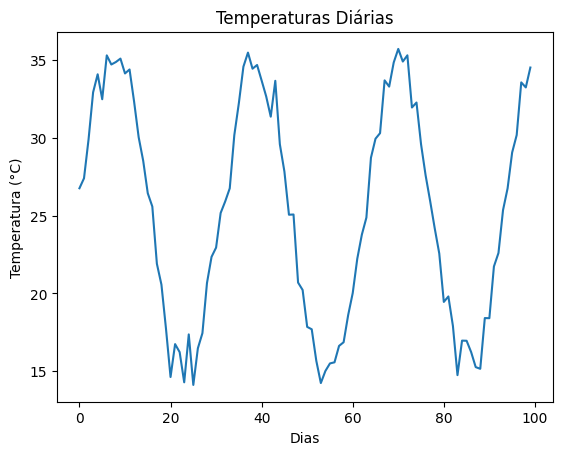

In [63]:
# Gerando os dados ficticíos de temparaturas diarias para os últimos 100 dias.
# temperatura segue uma um onda senoidal com um pouco de ruido para similar uma variação real
np.random.seed(0)

data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

# Transformando os dados em um DataFrame para faciliutar manupulação
df = pd.DataFrame(data, columns=['Temperatura'])

# exibir as primeiras linha do DataFrame para visalisação dos dados.
print(df.head())

# Visualização dos dados de temperatura, para ter uma idea das tendencias
plt.plot(df)
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Diárias')
plt.show()



##Passo 3: Pré-processamento dos Dados

Agora, vamos preparar os dados para que possam ser usados em uma rede LSTM. Como LSTMs trabalham com sequências, vamos transformar nossos dados em janelas deslizantes, onde cada janela contém as temperaturas dos últimos 30 dias, e a rede deverá prever o 31o dia.

In [64]:
# Preparação dos dados para que possamos usar em uma LSTM, Como LSTMs trabalham com seguencias, vamos

# Pre-processamento dos dados
# Nomalizando os dados para uma Escala de 0 a 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# definindo o número de dias para uma janela de tempo
n_sleeps = 30

# criando uma sequencia de entrada (x) e um saída (y)
x = []
y = []

for i in range(n_sleeps, len(scaled_data)):
    x.append(scaled_data[i-n_sleeps:i, 0])
    y.append(scaled_data[i, 0])


# convertendo a lista para arrys numpy
y = np.array(y)
x = np.array(x)

print(x.shape)
print(y.shape)

# Reshape dos dados de entrada para o formato esparado pelo LSTM
# O formato esparado é: [número de amostras, números de timestamps e número sde features]
x = x.reshape(x.shape[0], x.shape[1], 1)

print(f'Forma dos X (dados de entrada): {x.shape}')
print(f'Forma dos Y (dados de saída): {y.shape}')





(70, 30)
(70,)
Forma dos X (dados de entrada): (70, 30, 1)
Forma dos Y (dados de saída): (70,)


##Passo 4: Construção da Rede LSTM
Agora você criaremos uma rede LSTM simples com uma camada LSTM e uma camada densa para prever a temperatura.

In [65]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', input_shape=(x.shape[1], 1)))
model.add(Dense(1))

# compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo o resultado do modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

##Passo 5: Avaliação e Previsão
Agora que o modelo está treinado, vamos avaliar o desempenho e fazer previsões nos dados de teste.

In [66]:
# Passo 5: Treinamento, Avaliação e Previsão
print("Iniciando o treinamento do modelo...")
history = model.fit(x, y, epochs=200, batch_size=1, verbose=0)
print("Treinamento concluído.")

# Fazendo a previsão para o próximo dia (dia 101)
last_30_days = scaled_data[-n_steps:]
last_30_days = last_30_days.reshape(1, n_steps, 1)

# Fazendo a previsão
predicted_scaled_temp = model.predict(last_30_days)

# Invertendo a normalização para obter a temperatura na escala original
predicted_temp = scaler.inverse_transform(predicted_scaled_temp)

print(f'\nA temperatura prevista para amanhã (dia 31) é: {predicted_temp[0][0]:.2f} °C')

Iniciando o treinamento do modelo...
Treinamento concluído.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step

A temperatura prevista para amanhã (dia 31) é: 34.22 °C
